In [311]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

data perparation

In [281]:
ds = pd.read_csv("Online Retail.csv", encoding='latin1') #latin1 and ISO-8859-1: Both are often used for Western European languages and can handle a wide range of characters that might be present in the file. since that some characters can't be read in csv files 


In [282]:
ds

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50:00,4.15,12680.0,France


In [283]:
ds.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [284]:
ds.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [285]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [286]:
ds.duplicated().sum() #to check if there is duplicates or not

5268

In [287]:
ds.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

removing duplicated


In [288]:
ds.drop_duplicates(keep="first",inplace=True)#to remove duplicates 

In [289]:
ds = ds.dropna(subset=["CustomerID", 'Description'])

In [290]:
ds.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [291]:
ds.shape

(401604, 8)

In [292]:
import seaborn as sns

In [293]:
ds.describe(include='object').T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
InvoiceDate,401604,20460,11/14/2011 15:27:00,543
Country,401604,37,United Kingdom,356728


descovering the cancelled transactions and know that it is only 2%


In [294]:
#the invoice number is a 6 digit uniquely assigned if the number starts with c this means it is cancelled mentioned when downloaded
#np.where(condition,true,false)
ds['Status'] = np.where(ds['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
cancelled = ds[ds['Status'] == 'Cancelled'] 
cancelled.describe().drop('CustomerID', axis=1)#dropping the=customer id

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\3125633443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Status'] = np.where(ds['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [295]:
ds

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50:00,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50:00,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50:00,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50:00,4.15,12680.0,France,Completed


In [296]:
ds["total_price"] = ds["UnitPrice"]*ds["Quantity"] #getting the total price



C:\Users\samas\AppData\Local\Temp\ipykernel_32992\2404171498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["total_price"] = ds["UnitPrice"]*ds["Quantity"] #getting the total price


<Axes: xlabel='Country'>

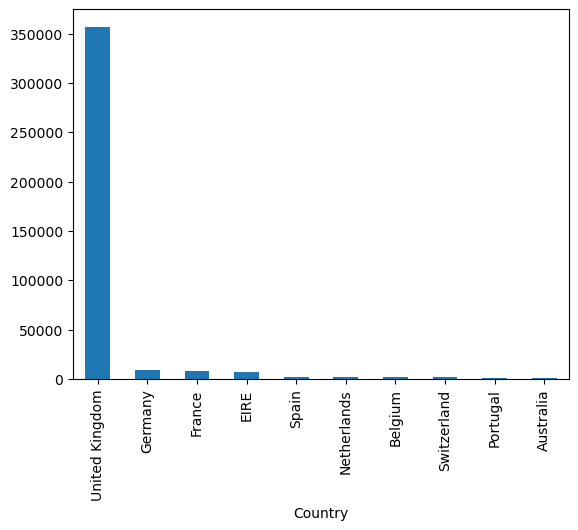

In [299]:
ds['Country'].value_counts().head(10).plot(kind = 'bar')

In [300]:
ds.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Status', 'total_price'],
      dtype='object')

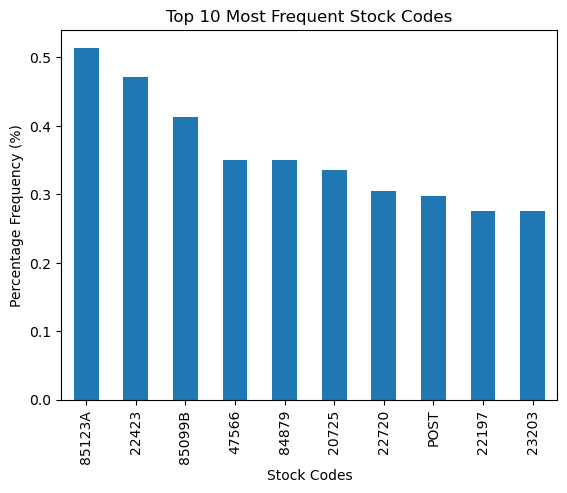

In [224]:
import matplotlib.pyplot as plt
topcodes = ds['StockCode'].value_counts(normalize=True).head(10) * 100 #to make the value counts to be percentage 

# Plotting the top 10 most frequent stock codes
plt.figure
topcodes.plot(kind='bar')

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Stock Codes')
plt.ylabel('Percentage Frequency (%)')
plt.show()
#seeing the top 10 codes in percentages to knowe which sti=ocks are the top sellers

In [225]:
import datetime as dt

In [226]:
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])# for python dates is not a type so we use datetime to use it
ds.loc[:, 'Year-Month'] = ds['InvoiceDate'].dt.to_period('M')

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\1606998335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])# for python dates is not a type so we use datetime to use it
C:\Users\samas\AppData\Local\Temp\ipykernel_32992\1606998335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.loc[:, 'Year-Month'] = ds['InvoiceDate'].dt.to_period('M')


In [227]:
ds

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,total_price,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12


In [228]:
monthly_sales = ds.groupby('Year-Month')['total_price'].sum()
monthly_sales

Year-Month
2010-12     552372.860
2011-01     473731.900
2011-02     435534.070
2011-03     578576.210
2011-04     425222.671
2011-05     647011.670
2011-06     606862.520
2011-07     573112.321
2011-08     615078.090
2011-09     929356.232
2011-10     973306.380
2011-11    1126815.070
2011-12     341539.430
Freq: M, Name: total_price, dtype: float64

In [229]:
ds["total_price"] = ds["UnitPrice"]*ds["Quantity"]
ds['Country'].value_counts().head(10).plot(kind = 'bar')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,total_price,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,16.60,2011-12


In [230]:
ds.drop(columns= [ 'Year-Month'], inplace=True)

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\2788008529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns= [ 'Year-Month'], inplace=True)


In [231]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds['Country_encoded'] = label_encoder.fit_transform(ds['Country'])
ds.drop(columns= [ 'Country'], inplace=True)
ds

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\3170151819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Country_encoded'] = label_encoder.fit_transform(ds['Country'])
C:\Users\samas\AppData\Local\Temp\ipykernel_32992\3170151819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns= [ 'Country'], inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Status,total_price,Country_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Completed,15.30,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Completed,20.34,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Completed,22.00,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Completed,20.34,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,Completed,20.34,35
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,Completed,10.20,13
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,Completed,12.60,13
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,Completed,16.60,13
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,Completed,16.60,13


In [232]:
ds['Country_encoded'].value_counts()

Country_encoded
35    356728
14      9480
13      8475
10      7475
30      2528
23      2371
3       2069
32      1877
26      1471
0       1258
24      1086
18       803
6        757
12       695
7        611
31       461
1        401
9        389
19       358
25       341
33       291
17       247
36       241
29       229
16       182
5        151
15       146
22       127
34        68
11        61
27        58
20        45
21        35
4         32
8         30
2         17
28        10
Name: count, dtype: int64

In [233]:

ds.dropna(inplace=True)

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\362464658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.dropna(inplace=True)


In [234]:
ds.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,total_price,Country_encoded
count,401604.000000,401604,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,20.613638,32.803080
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000,35.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000,35.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000,35.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,36.000000
std,250.283037,NaN,69.764035,1714.006089,430.352218,6.772753


In [235]:
summary_stats = ds.describe()
summary_stats

,Quantity,InvoiceDate,UnitPrice,CustomerID,total_price,Country_encoded
count,401604.000000,401604,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,20.613638,32.803080
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000,35.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000,35.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000,35.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,36.000000
std,250.283037,NaN,69.764035,1714.006089,430.352218,6.772753


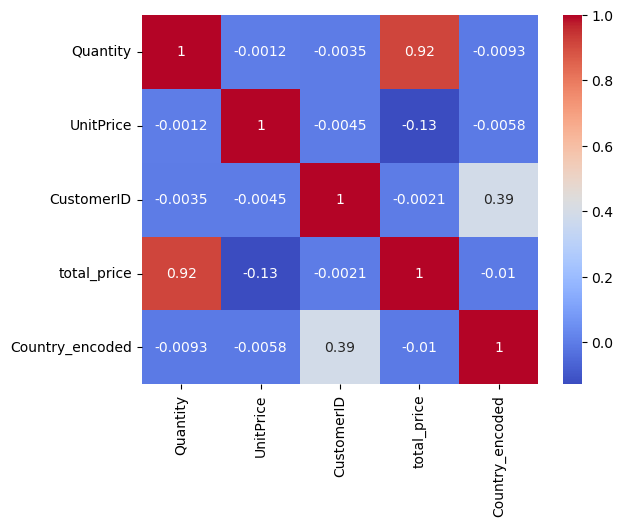

In [236]:
numeric_ds = ds.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_ds.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

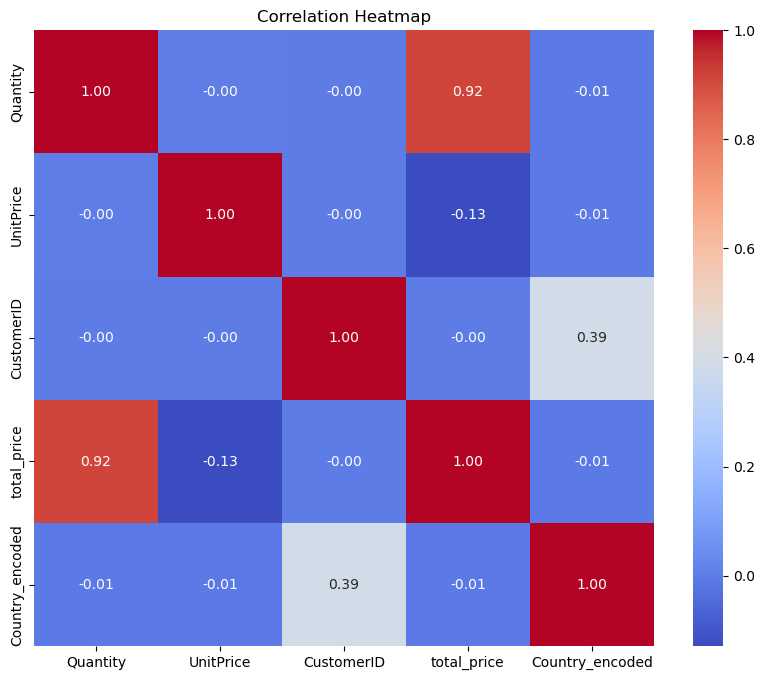

In [237]:
numeric_ds = ds.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_ds.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [238]:
rfm_df = ds.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime(ds['InvoiceDate'].max()) - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'total_price': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'total_price': 'Monetary'})
# Create the TotalPrice column
ds['TotalPrice'] = ds['Quantity'] * ds['UnitPrice']

# Perform the RFM aggregation
rfm_df = ds.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime(ds['InvoiceDate'].max()) - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\5790364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['TotalPrice'] = ds['Quantity'] * ds['UnitPrice']


In [239]:
ds['TotalPrice'] = ds['Quantity'] * ds['UnitPrice']
rfm_df = ds.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime(ds['InvoiceDate'].max()) - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})


C:\Users\samas\AppData\Local\Temp\ipykernel_32992\3229995347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['TotalPrice'] = ds['Quantity'] * ds['UnitPrice']


In [240]:
# Create the TotalPrice column
ds['TotalPrice'] = ds['Quantity'] * ds['UnitPrice']

# Perform the RFM aggregation
rfm_df = ds.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime(ds['InvoiceDate'].max()) - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})


C:\Users\samas\AppData\Local\Temp\ipykernel_32992\2658496519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['TotalPrice'] = ds['Quantity'] * ds['UnitPrice']


In [241]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Prepare the data for clustering (e.g., RFM analysis: Recency, Frequency, Monetary)
rfm_df = ds.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.to_datetime(ds['InvoiceDate'].max()) - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Normalize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

In [315]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

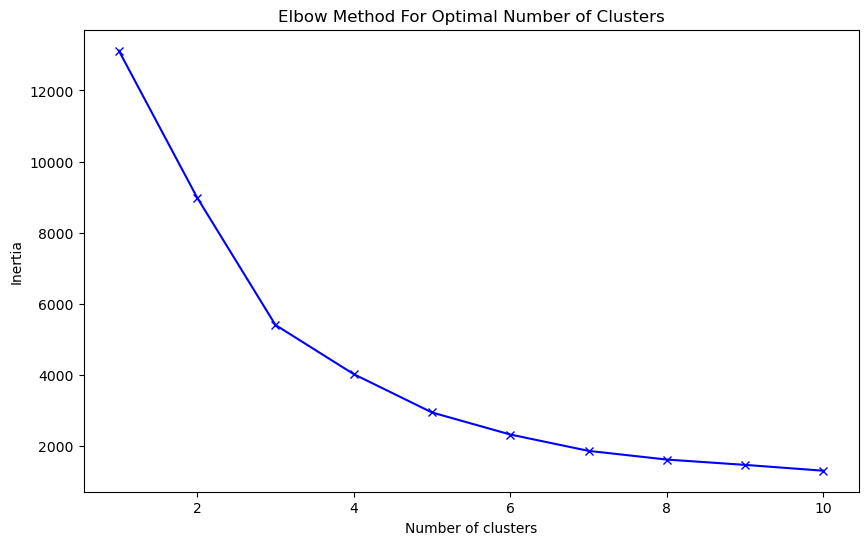

In [316]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [244]:
# Apply K-Means clustering with the chosen number of clusters
from sklearn.cluster import KMeans
optimal_clusters = 4 
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the clustered data
rfm_df.head()
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,2,0.00,1
12347.0,1,182,4310.00,0
12348.0,74,31,1797.24,0
12349.0,18,73,1757.55,0
12350.0,309,17,334.40,1


In [245]:
non_numeric_columns = ds.select_dtypes(include=['object']).columns
non_numeric_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Status'], dtype='object')

In [246]:
ds

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Status,total_price,Country_encoded,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Completed,15.30,35,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Completed,20.34,35,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Completed,22.00,35,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Completed,20.34,35,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,Completed,20.34,35,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,Completed,10.20,13,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,Completed,12.60,13,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,Completed,16.60,13,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,Completed,16.60,13,16.60


In [247]:
#ds.drop(columns= [ 'InvoiceNo'], inplace=True)

In [248]:
timestamp_columns = ds.select_dtypes(include=['datetime', 'datetimetz']).columns

for column in timestamp_columns:
  ds[column] = ds[column].apply(lambda x: x.timestamp())

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\2697268128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[column] = ds[column].apply(lambda x: x.timestamp())


In [249]:
rfm_scaled

array([[ 2.32202285, -0.39205597, -0.23041952],
       [-0.89373323,  0.39329343,  0.29405454],
       [-0.1691956 , -0.26552745, -0.01171748],
       ...,
       [-0.83418219, -0.34406239, -0.20892947],
       [-0.87388289,  2.74497857,  0.01849636],
       [-0.48680114, -0.09536842, -0.00684511]])

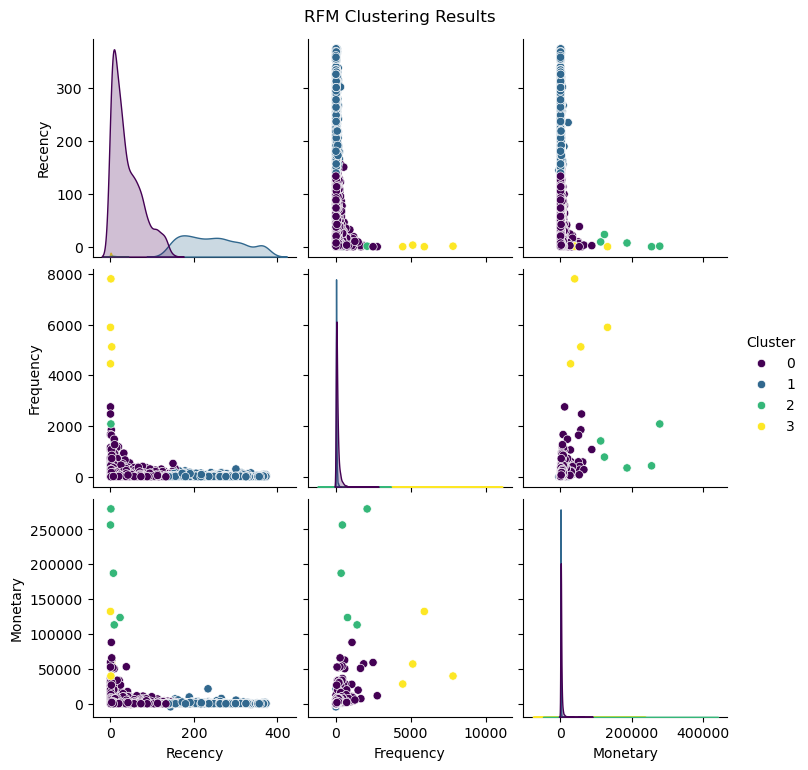

In [250]:
pairplot = sns.pairplot(rfm_df, hue='Cluster', palette='viridis', diag_kind='kde')
pairplot.fig.suptitle('RFM Clustering Results', y=1.02)  # Adjust title position
plt.show()

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\2824694570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=rfm_df, palette='viridis')


Text(0.5, 1.0, 'Recency Distribution by Cluster')

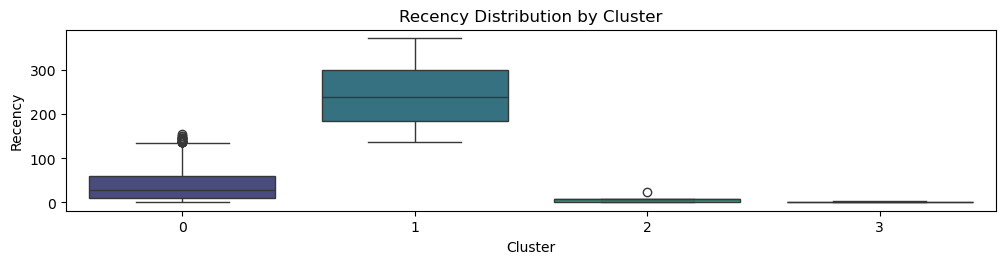

In [251]:
# Box plots to understand the distribution of RFM values within each cluster
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm_df, palette='viridis')
plt.title('Recency Distribution by Cluster')

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\121957648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=rfm_df, palette='viridis')


Text(0.5, 1.0, 'Frequency Distribution by Cluster')

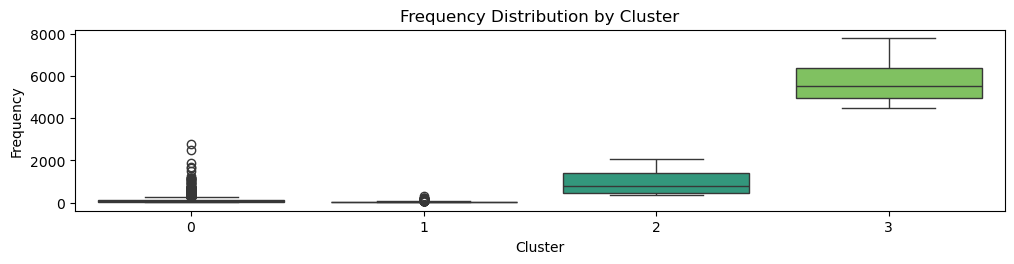

In [252]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm_df, palette='viridis')
plt.title('Frequency Distribution by Cluster')

C:\Users\samas\AppData\Local\Temp\ipykernel_32992\2366814165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Monetary', data=rfm_df, palette='viridis')


Text(0.5, 1.0, 'Monetary Distribution by Cluster')

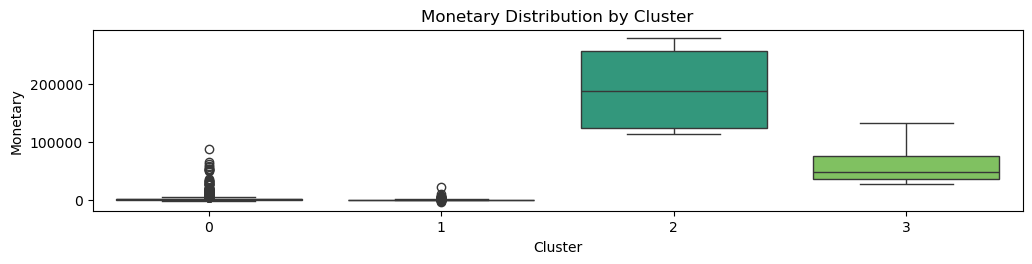

In [253]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm_df, palette='viridis')
plt.title('Monetary Distribution by Cluster')

In [302]:
import datetime as dt
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])
import pandas as pd

def calculate_rfm(group):
    last_date = pd.to_datetime('2024-01-01')  # Replace with your actual last date
    group['InvoiceDate'] = pd.to_datetime(group['InvoiceDate'])
    
    recency = (last_date - group['InvoiceDate'].max()).days
    frequency = group['InvoiceNo'].count()
    monetary = group['total_price'].sum()
    
    return pd.Series({'recency': recency, 'frequency': frequency, 'monetary': monetary})
    # Group data by CustomerID and calculate RFM values
RFM_data = ds.groupby("CustomerID").apply(calculate_rfm).reset_index()

# Print the resulting DataFrame
print(RFM_data.head())
# Assuming df is your DataFrame
result = ds.groupby('CustomerID').apply(calculate_rfm)


C:\Users\samas\AppData\Local\Temp\ipykernel_32992\4171868909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])
C:\Users\samas\AppData\Local\Temp\ipykernel_32992\4171868909.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  RFM_data = ds.groupby("CustomerID").apply(calculate_rfm).reset_index()


   CustomerID  recency  frequency  monetary
0     12346.0   4730.0        2.0      0.00
1     12347.0   4407.0      182.0   4310.00
2     12348.0   4480.0       31.0   1797.24
3     12349.0   4423.0       73.0   1757.55
4     12350.0   4715.0       17.0    334.40


C:\Users\samas\AppData\Local\Temp\ipykernel_32992\4171868909.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = ds.groupby('CustomerID').apply(calculate_rfm)


In [303]:
RFM_data=RFM_data.drop(columns=["CustomerID"])

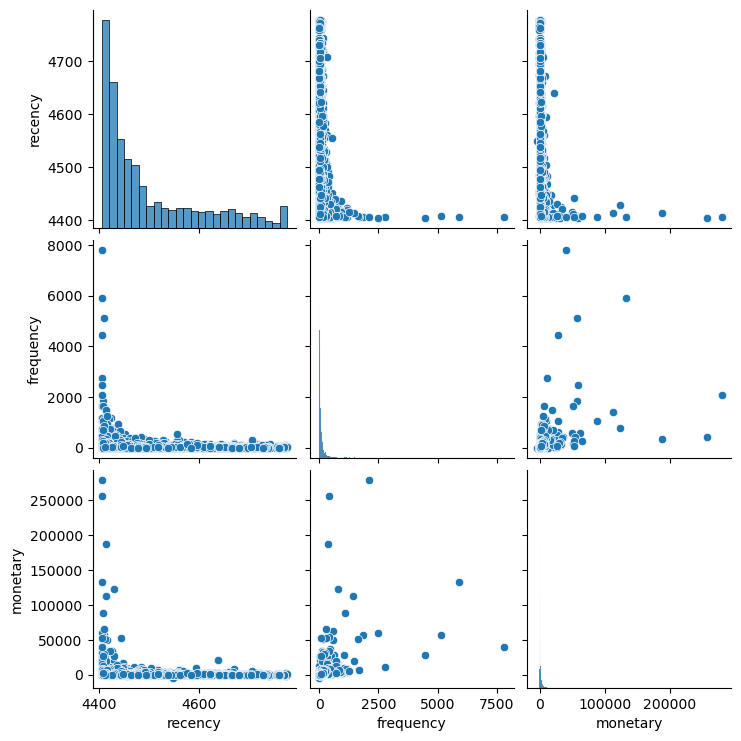

In [304]:
sns.pairplot(RFM_data)

In [305]:
sc = StandardScaler()
rfm_scl = sc.fit_transform(RFM_data)
rfm_scl

array([[ 2.31656788, -0.39205597, -0.23041952],
       [-0.88904975,  0.39329343,  0.29405454],
       [-0.16456032, -0.26552745, -0.01171748],
       ...,
       [-0.83942719, -0.34406239, -0.20892947],
       [-0.87912524,  2.74497857,  0.01849636],
       [-0.49206924, -0.09536842, -0.00684511]])

In [307]:
from sklearn.decomposition import PCA
pca = PCA()
rfm_pca = pca.fit_transform(rfm_scl)
pca.components_

array([[-0.39891318,  0.66325102,  0.63321904],
       [ 0.90707486,  0.18414474,  0.37855767],
       [ 0.13447481,  0.72538872, -0.67507609]])

In [308]:
pca.explained_variance_ratio_


array([0.51800815, 0.30096349, 0.18102837])

In [309]:

pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [310]:

inertia = {}
for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(rfm_scl)
    inertia[n_clusters] = kmeans.inertia_

In [312]:
for num in range(2,16):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(rfm_scl)

    sil_avg = silhouette_score(rfm_scl, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.576001041044238
For 3 The Silhouette Score is = 0.6003496372494422
For 4 The Silhouette Score is = 0.5980402784255586
For 5 The Silhouette Score is = 0.615316057621852
For 6 The Silhouette Score is = 0.5159418462137184
For 7 The Silhouette Score is = 0.5239153504710486
For 8 The Silhouette Score is = 0.4012648607461406
For 9 The Silhouette Score is = 0.40387520974391544
For 10 The Silhouette Score is = 0.42495566062315654
For 11 The Silhouette Score is = 0.4237702843066588
For 12 The Silhouette Score is = 0.4254612030469487
For 13 The Silhouette Score is = 0.4252856800196593
For 14 The Silhouette Score is = 0.4162161099315036
For 15 The Silhouette Score is = 0.3875162607766221


In [313]:

kmeans = KMeans(n_clusters=5, n_init=10)
preds = kmeans.fit_predict(rfm_scl)
RFM_data['NO_clusters'] = kmeans.labels_ +1
RFM_data

,recency,frequency,monetary,NO_clusters
0,4730.0,2.0,0.00,3
1,4407.0,182.0,4310.00,1
2,4480.0,31.0,1797.24,1
3,4423.0,73.0,1757.55,1
4,4715.0,17.0,334.40,3
...,...,...,...,...
4367,4682.0,10.0,180.60,3
4368,4585.0,7.0,80.82,3
4369,4412.0,13.0,176.60,1
4370,4408.0,721.0,2045.53,5


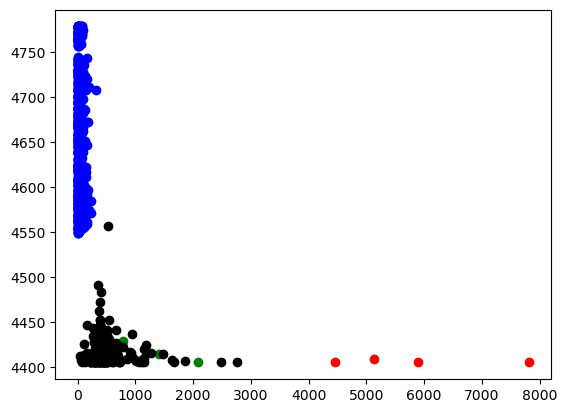

In [314]:
plt.scatter(RFM_data.iloc[preds==1,1],RFM_data.iloc[preds==1,0], color='red')
plt.scatter(RFM_data.iloc[preds==2,1],RFM_data.iloc[preds==2,0], color='blue')
plt.scatter(RFM_data.iloc[preds==3,1],RFM_data.iloc[preds==3,0], color='green')
plt.scatter(RFM_data.iloc[preds==4,1],RFM_data.iloc[preds==4,0], color='black')
plt.scatter(RFM_data.iloc[preds==5,1],RFM_data.iloc[preds==5,0], color='cyan')